In [104]:
%matplotlib inline

In [111]:
import numpy as np
from numpy.random import normal
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Generate Some Data

In [106]:
a, b = 30, 15

In [107]:
x = np.linspace(0, 100, 1000)

In [108]:
y = a * x + b

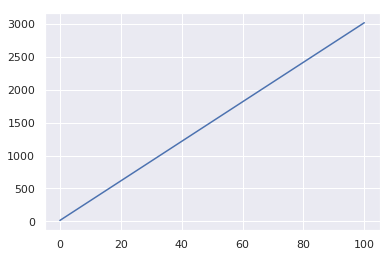

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)

In [6]:
x_train = np.linspace(0, 100, 100)

In [7]:
y_train = a * x_train + b + normal(size=len(x_train))

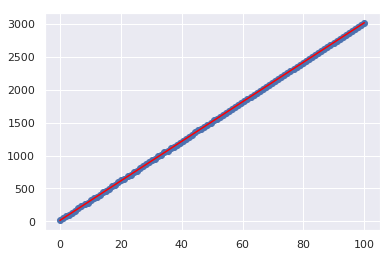

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_train, y_train)
ax.plot(x, y, color="red")

# Basic SGD

In [86]:
epochs = 20000
a_hat, b_hat = 0, 0
lr = 1e-4
basic_losses = []
for i in range(epochs):
    basic_losses.append([])
    for j in range(len(x_train)):
        prediction = a_hat * x_train[j] + b_hat
        loss = (prediction - y_train[j])**2
        basic_losses[-1].append(loss)
        grad_b = 2 * (prediction - y_train[j])
        grad_a = 2 * (prediction - y_train[j]) * x_train[j]
        a_hat = a_hat - grad_a * lr
        b_hat = b_hat - grad_b * lr
    if (i % 1000 == 0):
        print("The most recent after epoch %s is %s" % (i, np.mean(basic_losses[-1])))
        print("a_hat is %s" % a_hat)
        print("b_hat is %s" % b_hat)
print("Best loss: ", min(map(lambda x: np.mean(x), basic_losses)))

The most recent after epoch 0 is 24512.430756851212
a_hat is 30.13536449236623
b_hat is 1.698938830949585
The most recent after epoch 1000 is 2.1434907143731188
a_hat is 30.017240321617805
b_hat is 13.571934904914773
The most recent after epoch 2000 is 2.046933768492613
a_hat is 30.008522548326656
b_hat is 14.44818307160043
The most recent after epoch 3000 is 2.0478497471579074
a_hat is 30.007879161197014
b_hat is 14.512851740303468
The most recent after epoch 4000 is 2.047961150669298
a_hat is 30.007831678085832
b_hat is 14.517624402742005
The most recent after epoch 5000 is 2.0479696110262284
a_hat is 30.007828173748024
b_hat is 14.517976633694031
The most recent after epoch 6000 is 2.0479702367149715
a_hat is 30.007827915121695
b_hat is 14.518002628962922
The most recent after epoch 7000 is 2.0479702828989663
a_hat is 30.007827896034588
b_hat is 14.518004547459945
The most recent after epoch 8000 is 2.0479702863075264
a_hat is 30.007827894625922
b_hat is 14.518004689048368
The most 

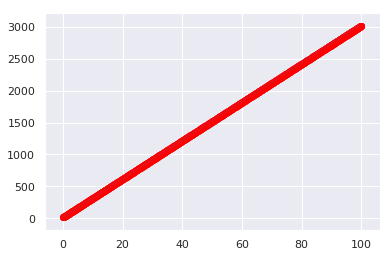

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_train * a_hat + b_hat)
ax.plot(x_train * a + b, color="red")
ax.scatter(x_train, y_train)
ax.scatter(x, y, color="red")

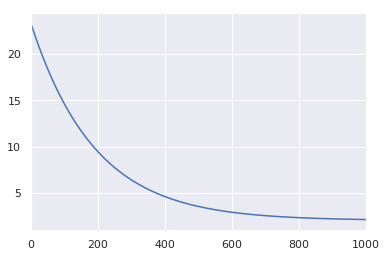

In [115]:
def plot_losses(losses, xlim=5):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(0,xlim)
    ax.plot(list(map(lambda x: np.mean(x), losses)))
plot_losses(basic_losses[1:], 1000)

In [63]:
print(a_hat, b_hat)

30.00782789451368 14.518004700329781


# Momentum

In [96]:
epochs = 20000
a_hat, b_hat = 0, 0
lr = 1e-4
mom = 0.9
mom_losses = []
for i in range(epochs):
    mom_losses.append([])
    for j in range(len(x_train)):
        iter_num = len(x_train) * i + j
        prediction = a_hat * x_train[j] + b_hat
        loss = (prediction - y_train[j])**2
        mom_losses[-1].append(loss)
        if (iter_num < 10):
            grad_b = 2 * (prediction - y_train[j])
            grad_a = 2 * (prediction - y_train[j]) * x_train[j]
        else:
            grad_b = 2 * (prediction - y_train[j]) * (1 - mom) + grad_b * mom
            grad_a = 2 * (prediction - y_train[j]) * x_train[j] * (1 - mom) + grad_a * mom
        a_hat = a_hat - grad_a * lr
        b_hat = b_hat - grad_b * lr
    if (i % 1000 == 0):
        print("The most recent after epoch %s is %s" % (i, np.mean(mom_losses[-1])))
        print("a_hat is %s" % a_hat)
        print("b_hat is %s" % b_hat)
print("Best loss: ", min(map(lambda x: np.mean(x), mom_losses)))

The most recent after epoch 0 is 38202.50571267373
a_hat is 30.26809527100037
b_hat is 2.194808134996273
The most recent after epoch 1000 is 1.7524687919727737
a_hat is 30.003180014279927
b_hat is 14.659056881829526
The most recent after epoch 2000 is 1.7413629368421926
a_hat is 29.995604876303894
b_hat is 15.405909244721052
The most recent after epoch 3000 is 1.747145995595285
a_hat is 29.99515174008678
b_hat is 15.450585111422434
The most recent after epoch 4000 is 1.7475150023632398
a_hat is 29.995124633988922
b_hat is 15.453257571422284
The most recent after epoch 5000 is 1.7475371584860846
a_hat is 29.995123012532694
b_hat is 15.453417434967575
The most recent after epoch 6000 is 1.7475384841357025
a_hat is 29.99512291553901
b_hat is 15.453426997824867
The most recent after epoch 7000 is 1.7475385634356115
a_hat is 29.995122909736953
b_hat is 15.453427569864136
The most recent after epoch 8000 is 1.7475385681792954
a_hat is 29.995122909389877
b_hat is 15.45342760408278
The most re

In [65]:
def loss_list(losses):
    return list(map(lambda x: np.mean(x), losses))

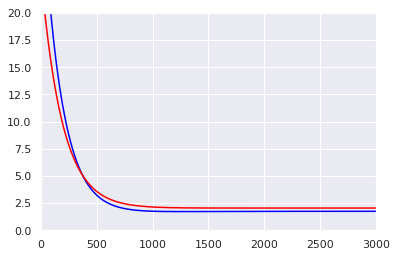

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111)
# momentum_losses = losses
ax.set_xlim(0,3000)
ax.set_ylim(0,20)
plt.plot(loss_list(mom_losses), color="blue")
plt.plot(loss_list(basic_losses), color="red")
# plot_losses(losses[1:], 1000)

We see that the model converges a bit more slowly, but hits a better loss -- 1.72 v.s. 2.04.

# RMSProp

In [98]:
epochs = 20000
a_hat, b_hat = 0, 0
lr = 1e-3
rms_param = 0.3
rms_losses = []
grad_bs = []
grad_as = []
for i in range(epochs):
    rms_losses.append([])
    for j in range(len(x_train)):
        iter_num = i * len(x_train) + j
        prediction = a_hat * x_train[j] + b_hat
        loss = (prediction - y_train[j])**2
        rms_losses[-1].append(loss)
        grad_bs.append(2 * (prediction - y_train[j]))
        grad_as.append(2 * (prediction - y_train[j]) * x_train[j])
        if (iter_num >= 10):
            a_hat = a_hat - np.divide(grad_as[iter_num]*lr, np.sqrt(rms_param*np.longdouble(grad_as[iter_num - 1])**2 + (1 - rms_param)*np.longdouble(grad_as[iter_num])**2))
            b_hat = b_hat - np.divide(grad_bs[iter_num]*lr, np.sqrt(rms_param*np.longdouble(grad_bs[iter_num - 1])**2 + (1 - rms_param)*np.longdouble(grad_bs[iter_num])**2))
        else:
            a_hat = a_hat - grad_as[iter_num] * lr
            b_hat = b_hat - grad_bs[iter_num] * lr           
    if (i % 1000 == 0):
        print("The most recent after epoch %s is %s" % (i, np.mean(rms_losses[-1])))
        print("a_hat is %s" % a_hat)
        print("b_hat is %s" % b_hat)
print("Best loss: ", min(map(lambda x: np.mean(x), rms_losses)))

The most recent after epoch 0 is 802017.8116038730879
a_hat is 14.751660850007654506
b_hat is 2.5909878274131463779
The most recent after epoch 1000 is 2.844305886980223356
a_hat is 29.975564101891991317
b_hat is 17.235959257561684036
The most recent after epoch 2000 is 2.2803998817741332607
a_hat is 29.982413759749922543
b_hat is 16.694623823447716057
The most recent after epoch 3000 is 1.94728014045275623
a_hat is 29.987831864937153697
b_hat is 16.28757541300921167
The most recent after epoch 4000 is 1.8815974721430217491
a_hat is 29.989058841940001812
b_hat is 16.192846042445374698
The most recent after epoch 5000 is 1.8726053675090534326
a_hat is 29.98923148032457333
b_hat is 16.179368810715597841
The most recent after epoch 6000 is 1.8713847188096447777
a_hat is 29.989255009352629614
b_hat is 16.177529140099791682
The most recent after epoch 7000 is 1.8712190699593260839
a_hat is 29.989258204122919019
b_hat is 16.177279296972858658
The most recent after epoch 8000 is 1.87119659106

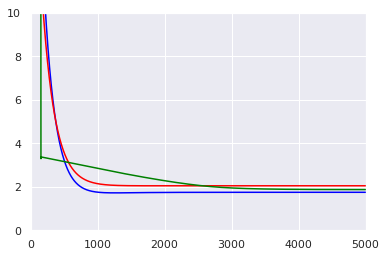

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)
# momentum_losses = losses
ax.set_xlim(0,5000)
ax.set_ylim(0,10)
plt.plot(loss_list(mom_losses), color="blue")
plt.plot(loss_list(basic_losses), color="red")
plt.plot(loss_list(rms_losses), color="green")

# Adam

In [100]:
epochs = 20000
a_hat, b_hat = 0, 0
lr = 3e-3
rms_param = 0.3
mom = 0.9
adam_losses = []
grad_bs = []
grad_as = []
for i in range(epochs):
    adam_losses.append([])
    for j in range(len(x_train)):
        iter_num = i * len(x_train) + j
        prediction = a_hat * x_train[j] + b_hat
        loss = (prediction - y_train[j])**2
        adam_losses[-1].append(loss)
        grad_bs.append(2 * (prediction - y_train[j]))
        grad_as.append(2 * (prediction - y_train[j]) * x_train[j])
        if (iter_num >= 10):
            a_hat = a_hat - (grad_as[iter_num] * (1 - mom) + grad_as[iter_num - 1] * mom) * np.divide(lr, np.sqrt(rms_param*np.longdouble(grad_as[iter_num - 1])**2 + (1 - rms_param)*np.longdouble(grad_as[iter_num])**2))
            b_hat = b_hat - (grad_bs[iter_num] * (1 - mom) + grad_bs[iter_num - 1] * mom) * np.divide(lr, np.sqrt(rms_param*np.longdouble(grad_bs[iter_num - 1])**2 + (1 - rms_param)*np.longdouble(grad_bs[iter_num])**2))
        else:
            a_hat = a_hat - grad_as[iter_num] * lr
            b_hat = b_hat - grad_bs[iter_num] * lr           
    if (i % 1000 == 0):
        print("The most recent after epoch %s is %s" % (i, np.mean(adam_losses[-1])))
        print("a_hat is %s" % a_hat)
        print("b_hat is %s" % b_hat)
print("Best loss: ", min(map(lambda x: np.mean(x), adam_losses)))

The most recent after epoch 0 is 19955.431978851429259
a_hat is 27.836912111528414125
b_hat is 5.63060179666048893
The most recent after epoch 1000 is 1.7871369178379331396
a_hat is 29.99174046201688297
b_hat is 15.931307885528224598
The most recent after epoch 2000 is 1.7931569036606346878
a_hat is 29.991582977362539445
b_hat is 15.9459713023267433615
The most recent after epoch 3000 is 1.7931569036606362768
a_hat is 29.991582977362539407
b_hat is 15.945971302326747281
The most recent after epoch 4000 is 1.7931569036606362768
a_hat is 29.991582977362539407
b_hat is 15.945971302326747281
The most recent after epoch 5000 is 1.7931569036606362768
a_hat is 29.991582977362539407
b_hat is 15.945971302326747281
The most recent after epoch 6000 is 1.7931569036606362768
a_hat is 29.991582977362539407
b_hat is 15.945971302326747281
The most recent after epoch 7000 is 1.7931569036606362768
a_hat is 29.991582977362539407
b_hat is 15.945971302326747281
The most recent after epoch 8000 is 1.7931569

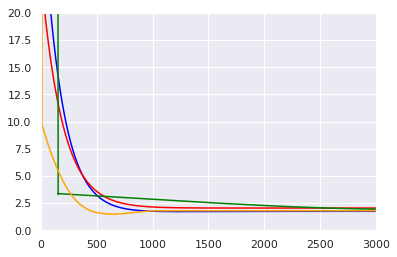

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)
# momentum_losses = losses
ax.set_xlim(0,3000)
ax.set_ylim(0,20)
plt.plot(loss_list(mom_losses), color="blue")
plt.plot(loss_list(basic_losses), color="red")
plt.plot(loss_list(rms_losses), color="green")
plt.plot(loss_list(adam_losses), color="orange")

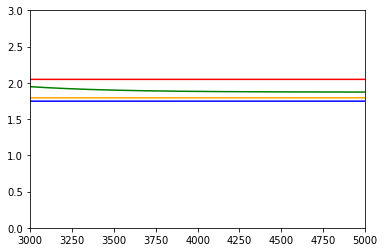

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(3000, 5000)
ax.set_ylim(0,3)
plt.plot(loss_list(mom_losses), color="blue")
plt.plot(loss_list(basic_losses), color="red")
plt.plot(loss_list(rms_losses), color="green")
plt.plot(loss_list(adam_losses), color="orange")
plt.show()

Adam gives us the same initial "pop" that we get from RMSProp, but the loss curve is much smoother, and the loss is consistently lower throughout training. Adam gives us the lowest loss overall and is consistently lower than other methods until convergence. The momentum-only model is comparable to the Adam model, but I have a strong suspicion that we could turn the learning rate down to capture some additional gains. It would be interesting to see how the different optimizers respond to follow-on training cycles with lower learning rates. 